In [1]:
%load_ext sql
%sql mysql://sywang@localhost/?charset=utf8mb4

In [2]:
database = 'sywang_project' ## THIS IS YOUR SUNETID
msgs_table = 'msgs'

In [3]:
%sql use {database}

 * mysql://sywang@localhost/?charset=utf8mb4
0 rows affected.


[]

model topics using mallet and all of the posts available 

This is a helper python function to write a ngram feat table from mysql (after we tokenized) to a "messages" file that mallet can read.  
Note: This could also be written in R within the use of `dbGetQuery`.

In [4]:
import operator
from termcolor import cprint
from tqdm.auto import tqdm

def write_msgs_from_feat(feat_table, msg_f):
    message_ids = %sql select distinct(group_id) from {feat_table}    
    with open(msgs_f,'w') as msgs_fh:
        for message_id in tqdm(message_ids,desc='msgs written'):
            message_id = message_id[0]
            feats = %sql select feat from {feat_table} where group_id = {message_id}
            feats = map(operator.itemgetter(0),feats)
            feats = ' '.join(feats)
            msgs_fh.write(' '.join([str(message_id),'en',feats]) + '\n')

In [5]:
feat_1gram_table = 'feat$1gram$msgs$message_id$16to16'

In [8]:
%sql select * from {feat_1gram_table} limit 5

 * mysql://sywang@localhost/?charset=utf8mb4
5 rows affected.


[(1, 1, 'in', 3, 0.010067114093959731),
 (2, 1, 'the', 16, 0.053691275167785234),
 (3, 1, 'last', 1, 0.003355704697986577),
 (4, 1, 'couple', 1, 0.003355704697986577),
 (5, 1, 'of', 15, 0.050335570469798654)]

remove common words, only the top 25, because glaucoma is #28 or something

In [9]:
%sql select feat,sum(value) as n_occ from {feat_1gram_table} group by feat order by n_occ desc limit 30

 * mysql://sywang@localhost/?charset=utf8mb4
30 rows affected.


[('-', Decimal('44960')),
 ('.', Decimal('12925')),
 (',', Decimal('11744')),
 ('the', Decimal('11251')),
 ('â', Decimal('6844')),
 ('to', Decimal('6389')),
 ('and', Decimal('6351')),
 ('of', Decimal('5500')),
 ('a', Decimal('4727')),
 ('in', Decimal('3975')),
 ('i', Decimal('3753')),
 ('is', Decimal('3443')),
 ('for', Decimal('2882')),
 ('with', Decimal('2638')),
 ('that', Decimal('2294')),
 ('this', Decimal('2132')),
 (')', Decimal('1966')),
 ('(', Decimal('1952')),
 ('you', Decimal('1875')),
 ('have', Decimal('1846')),
 ('/', Decimal('1806')),
 ('it', Decimal('1676')),
 ('or', Decimal('1647')),
 ('be', Decimal('1598')),
 ('on', Decimal('1518')),
 ('?', Decimal('1488')),
 ('not', Decimal('1475')),
 ('are', Decimal('1419')),
 ('glaucoma', Decimal('1387')),
 ('if', Decimal('1311'))]

In [10]:
feat_1gram_pruned_table = 'feat_pruned$1gram$msgs$message_id$16to16'

In [11]:
%sql select count(*) from {feat_1gram_table}

 * mysql://sywang@localhost/?charset=utf8mb4
1 rows affected.


[(182794,)]

In [13]:
%%sql 
drop table if exists {feat_1gram_pruned_table}; 
create table {feat_1gram_pruned_table} as
(
    select 
        A.* 
    from 
        {feat_1gram_table} as A,
        (select 
             feat,
             sum(value) as n_occ 
         from {feat_1gram_table} 
         group by feat 
         order by n_occ desc 
         limit 182794
         offset 25) as B
    where A.feat = B.feat
)

 * mysql://sywang@localhost/?charset=utf8mb4
0 rows affected.
155083 rows affected.


[]

In [14]:
%sql select feat,sum(value) as n_occ from {feat_1gram_pruned_table} group by feat order by n_occ desc limit 100

 * mysql://sywang@localhost/?charset=utf8mb4
100 rows affected.


[('?', Decimal('1488')),
 ('not', Decimal('1475')),
 ('are', Decimal('1419')),
 ('glaucoma', Decimal('1387')),
 ('if', Decimal('1311')),
 ('we', Decimal('1289')),
 (':', Decimal('1267')),
 ('as', Decimal('1246')),
 ('md', Decimal('1241')),
 ('"', Decimal('1210')),
 ('from', Decimal('1187')),
 ('was', Decimal('1150')),
 ('at', Decimal('1101')),
 ('but', Decimal('1100')),
 ('eye', Decimal('1030')),
 ('my', Decimal('1029')),
 ('an', Decimal('980')),
 ('patients', Decimal('923')),
 ('would', Decimal('853')),
 ('by', Decimal('836')),
 ('can', Decimal('815')),
 ('patient', Decimal('786')),
 ('all', Decimal('761')),
 ('any', Decimal('753')),
 ('will', Decimal('747')),
 ('iop', Decimal('734')),
 ('has', Decimal('695')),
 ('our', Decimal('692')),
 ('do', Decimal('659')),
 ('your', Decimal('631')),
 ('!', Decimal('629')),
 ('had', Decimal('627')),
 ('so', Decimal('617')),
 ('there', Decimal('604')),
 ('~', Decimal('578')),
 ('no', Decimal('568')),
 ('what', Decimal('559')),
 ('may', Decimal('557')),
 ('use', Decimal('548')),
 ('tube', Decimal('519')),
 ('more', Decimal('514')),
 ('new', Decimal('507')),
 ('which', Decimal('498')),
 ('he', Decimal('488')),
 ('about', Decimal('484')),
 ('surgery', Decimal('481')),
 ('who', Decimal('479')),
 ('they', Decimal('475')),
 ('one', Decimal('466')),
 ('some', Decimal('466')),
 ('time', Decimal('459')),
 ('university', Decimal('448')),
 ('how', Decimal('447')),
 ('also', Decimal('425')),
 ('ophthalmology', Decimal('417')),
 ('me', Decimal('414')),
 ('been', Decimal('404')),
 ('other', Decimal('395')),
 ('€', Decimal('393')),
 ('her', Decimal('386')),
 ('when', Decimal('381')),
 ('she', Decimal('380')),
 ('after', Decimal('368')),
 ('these', Decimal('361')),
 ('out', Decimal('358')),
 ('than', Decimal('355')),
 ('his', Decimal('354')),
 ('just', Decimal('354')),
 ('should', Decimal('353')),
 ('health', Decimal('353')),
 ('thanks', Decimal('343')),
 ('know', Decimal('341')),
 ('see', Decimal('339')),
 ('were', Decimal('338')),
 ('good', Decimal('337')),
 ('%', Decimal('336')),
 ('then', Decimal('332')),
 ('please', Decimal('332')),
 ('like', Decimal('328')),
 ('their', Decimal('324')),
 ('very', Decimal('323')),
 ('up', Decimal('316')),
 ('1', Decimal('316')),
 ('sent', Decimal('313')),
 ('2', Decimal('310')),
 ('professor', Decimal('310')),
 ('well', Decimal('307')),
 ('only', Decimal('305')),
 ('medical', Decimal('302')),
 ('am', Decimal('296')),
 ('over', Decimal('296')),
 ('get', Decimal('295')),
 ('now', Decimal('295')),
 ('cataract', Decimal('295')),
 ('ags', Decimal('290')),
 ('information', Decimal('278')),
 ('us', Decimal('270')),
 ('using', Decimal('264')),
 ('years', Decimal('264')),
 ('case', Decimal('264'))]

In [15]:
# Output directory to hold files generated. This can be any path in your home. 
out_d = '/home/sywang/mallet_output_ags' ## SET TO YOUR SUNET
!mkdir -p {out_d}

In [16]:
!rm -rf {out_d}/*

Run the function that puts the tokens back together to form full messages and writes a file in a format expected by mallet.

In [17]:
msgs_f = f'{out_d}/msgs.txt'
%sql alter table {feat_1gram_pruned_table} add index group_id (group_id)
write_msgs_from_feat(feat_1gram_pruned_table,msgs_f)

 * mysql://sywang@localhost/?charset=utf8mb4
0 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
1908 rows affected.


 * mysql://sywang@localhost/?charset=utf8mb4
148 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
18 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
75 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
34 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
135 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
123 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
63 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
156 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
44 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
85 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
121 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
30 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
22 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
22 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
70 rows affected.
 * mysql://sywang@localhost/?charset=utf8mb4
187 r

The above function call wrote the file *msgs.txt*.

### 3b) mallet formats its msgs file 

mallet will convert the file we just wrote to its own format. Refer to [mallet docs](http://mallet.cs.umass.edu/import.php) for details on this command.
- `--keep-sequence` This option preserves the document as a sequence of word features, rather than a vector of word feature counts. Use this option for sequence labeling tasks. The MALLET topic modeling toolkit also requires feature sequences rather than feature vectors.
- `--remove-stopwords` This option tells MALLET to ignore a standard list of very common English adverbs, conjunctions, pronouns and prepositions. There are several other options related to stopword specification.

In [18]:
# File for mallet to store the data in its own format.
mallet_msgs_f = f'{out_d}/msgs.mallet' 

!/shared/mallet/bin/mallet \
    import-file \
    --input {msgs_f} \
    --output {mallet_msgs_f} \
    --remove-stopwords \
    --keep-sequence

The above command wrote a file *msgs.mallet*.

In [19]:
!ls -lht {out_d}

total 1.7M
-rw-r--r-- 1 sywang students 666K Nov 16 04:57 msgs.mallet
-rw-r--r-- 1 sywang students 1.1M Nov 16 04:56 msgs.txt


## 4) mallet runs LDA 
mallet can now run LDA to extract topics on the file *msgs.mallet* it just generated. Refer to [mallet docs](http://mallet.cs.umass.edu/topics.php) for details on this command. There may be other options you want to tweak based on your usecase. This can take several minutes/hours depending on size of the data.  
The important variable is the number of topics you'd like to make: -- `num-topics`.

In [82]:
# Files mallet writes as its output after training topics. 
# Please refer to mallet docs for details on this command on what these files contain.
model_f = f'{out_d}/mallet.model'
state_f = f'{out_d}/state.gz'
topic_keys_f = f'{out_d}/topic_keys.txt'
doc_topics_f = f'{out_d}/doc_topics.txt'

!/shared/mallet/bin/mallet \
    train-topics \
    --input {mallet_msgs_f} \
    --num-topics 40 \
    --output-model {model_f} \
    --output-state {state_f} \
    --output-topic-keys {topic_keys_f} \
    --output-doc-topics {doc_topics_f}

Mallet LDA: 40 topics, 6 topic bits, 111111 topic mask
Data loaded.
max tokens: 456
total tokens: 96243
<10> LL/token: -9.97442
<20> LL/token: -9.67924
<30> LL/token: -9.54723
<40> LL/token: -9.47195

0	0.125	clinic practice community email fellow fellowship program center system training including current contact make residency research team level general chair 
1	0.125	glaucoma beach advice field eye cell associates input loss didn't started gmail visual iop referred central drops woman thoughts left 
2	0.125	iop surgery case cpc patient lower pressure treatment cataract medical tube progression clear high iops angle early developed history dear 
3	0.125	george tube jeff xen plate agree baerveldt tanaka sclera anterior conjunctiva luck vision technique implant freedman fayetteville vold conj failure 
4	0.125	ags time members days hope great feel open people things provided safe change potential part day test forum helpful support 
5	0.125	iop low eyes year effect normal increased day

The above command produced some files in our output dir. Descriptions of what these are should be in [command docs](http://mallet.cs.umass.edu/topics.php).  

- `--output-model [FILENAME]` This option specifies a file to write a serialized MALLET topic trainer object. This type of output is appropriate for pausing and restarting training, but does not produce data that can easily be analyzed.  
- `--output-state [FILENAME]` Similar to output-model, this option outputs a compressed text file containing the words in the corpus with their topic assignments. This file format can easily be parsed and used by non-Java-based software. Note that the state file will be GZipped, so it is helpful to provide a filename that ends in .gz.  
- `--output-doc-topics [FILENAME]` This option specifies a file to write the topic composition of documents. See the --help options for parameters related to this file.  
- `--output-topic-keys [FILENAME]` This file contains a "key" consisting of the top k words for each topic (where k is defined by the optional `--num-top-words` option). This output can be useful for checking that the model is working as well as displaying results of the model. In addition, this file reports the Dirichlet parameter of each topic. If hyperparameter optimization is turned on, this number will be roughly proportional to the overall portion of the collection assigned to a given topic.  

You may want to look at these files to see what have.

In [83]:
!ls -lht {out_d}

total 10M
-rw-r--r-- 1 sywang students 1.7M Nov 16 06:51 mallet.model
-rw-r--r-- 1 sywang students 1.5M Nov 16 06:51 doc_topics.txt
-rw-r--r-- 1 sywang students 796K Nov 16 06:51 state.gz
-rw-r--r-- 1 sywang students 6.2K Nov 16 06:51 topic_keys.txt
drwxr-xr-x 3 sywang students 4.0K Nov 16 06:45 ags_topic_wordclouds
-rw-r--r-- 1 sywang students 230K Nov 16 06:45 msgs_lda.topics_ags.freq.threshed50.loglik.csv
-rw-r--r-- 1 sywang students 705K Nov 16 06:45 msgs_lda.topics_ags.wordGivenTopic.csv
-rw-r--r-- 1 sywang students 621K Nov 16 06:45 msgs_lda.topics_ags.loglik.csv
-rw-r--r-- 1 sywang students 416K Nov 16 06:45 msgs_lda.topics_ags.topicGivenWord.csv
-rw-r--r-- 1 sywang students 2.5M Nov 16 06:44 topics_ags
-rw-r--r-- 1 sywang students 666K Nov 16 04:57 msgs.mallet
-rw-r--r-- 1 sywang students 1.1M Nov 16 04:56 msgs.txt


In [62]:
!ls -lht {out_d}

total 11M
-rw-r--r-- 1 sywang students 1.7M Nov  5 21:22 mallet.model
-rw-r--r-- 1 sywang students 1.8M Nov  5 21:22 doc_topics.txt
-rw-r--r-- 1 sywang students 799K Nov  5 21:22 state.gz
-rw-r--r-- 1 sywang students 7.7K Nov  5 21:22 topic_keys.txt
drwxr-xr-x 3 sywang students 4.0K Nov  5 21:19 ags_topic_wordclouds
-rw-r--r-- 1 sywang students 213K Nov  5 21:19 msgs_lda.topics_ags.freq.threshed50.loglik.csv
-rw-r--r-- 1 sywang students 646K Nov  5 21:19 msgs_lda.topics_ags.wordGivenTopic.csv
-rw-r--r-- 1 sywang students 564K Nov  5 21:19 msgs_lda.topics_ags.loglik.csv
-rw-r--r-- 1 sywang students 359K Nov  5 21:19 msgs_lda.topics_ags.topicGivenWord.csv
-rw-r--r-- 1 sywang students 2.5M Nov  5 21:19 topics_ags
drwxr-xr-x 2 sywang students 4.0K Nov  5 21:13 output_alltopics
-rw-r--r-- 1 sywang students 666K Nov  5 21:02 msgs.mallet
-rw-r--r-- 1 sywang students 1.1M Nov  5 21:01 msgs.txt


## 5) getting Mallet output into DLATK tables

### 5a) dlatk converts mallet output to an intermediate file
mallet successfully trained a topic model with LDA. Now we format mallet output for use with dlatk. Here `--add_message_id` adds the message ids to the topic distributions and stores the result in `--output_name`.

In [84]:
# File for dlatk to write the mallet output into a format dlatk can read.
topics_f = f'{out_d}/topics_ags'

!dlatkInterface.py \
    --add_message_id {msgs_f} {state_f} \
    --output_name {topics_f}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-16 06:51:52
-----
--
Interface Runtime: 0.21 seconds
DLATK exits with success! A good day inde

The above command produced the file *topics*.

In [85]:
!ls -lht {out_d}

total 10M
-rw-r--r-- 1 sywang students 2.5M Nov 16 06:51 topics_ags
drwxr-xr-x 3 sywang students 4.0K Nov 16 06:51 ags_topic_wordclouds
-rw-r--r-- 1 sywang students 1.7M Nov 16 06:51 mallet.model
-rw-r--r-- 1 sywang students 1.5M Nov 16 06:51 doc_topics.txt
-rw-r--r-- 1 sywang students 796K Nov 16 06:51 state.gz
-rw-r--r-- 1 sywang students 6.2K Nov 16 06:51 topic_keys.txt
-rw-r--r-- 1 sywang students 230K Nov 16 06:45 msgs_lda.topics_ags.freq.threshed50.loglik.csv
-rw-r--r-- 1 sywang students 705K Nov 16 06:45 msgs_lda.topics_ags.wordGivenTopic.csv
-rw-r--r-- 1 sywang students 621K Nov 16 06:45 msgs_lda.topics_ags.loglik.csv
-rw-r--r-- 1 sywang students 416K Nov 16 06:45 msgs_lda.topics_ags.topicGivenWord.csv
-rw-r--r-- 1 sywang students 666K Nov 16 04:57 msgs.mallet
-rw-r--r-- 1 sywang students 1.1M Nov 16 04:56 msgs.txt


### 5b) dlatk ingest Mallet output into mysql to an intermediate table

dlatk can now ingest the topics results into mysql. The following command creates an intermediate table later used to created lexicon tables.

In [86]:
!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --add_lda_messages {topics_f}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-16 06:52:00
-----
SQL QUERY: DROP TABLE IF EXISTS msgs_lda$topics_ags
SQL QUERY: CREATE TABLE 

The above command produced table `msgs_lda$topics`.

In [87]:
msgs_lda_table = 'msgs_lda$topics_ags'

In [88]:
%sql select * from {msgs_lda_table} limit 1

 * mysql://sywang@localhost/?charset=utf8mb4
1 rows affected.


[(1, 1, 'Jeffrey Kalenak', 1, '[{"doc": "0", "message_id": "1", "index": "0", "term_id": "0", "term": "couple", "topic_id": "12"}, {"doc": "0", "message_id": "1", "index": "1", "te ... (9158 characters truncated) ... id": "91", "term": "lte", "topic_id": "26"}, {"doc": "0", "message_id": "1", "index": "92", "term_id": "92", "term": "smartphone", "topic_id": "26"}]', datetime.date(2020, 9, 13), 2)]

### 5c) dlatk writes topic tables to files

Using the table `msgs_lda$topics`, dlatk can produce csv files that can be used to create lexicon tables topic-given-word and word-given-topic.

In [89]:
%cd {out_d}

!dlatkInterface.py \
    --corpdb {database} \
    --corptable {msgs_table} \
    --lda_msg_tbl '{msgs_lda_table}' \
    --create_dists

/home/sywang/mallet_output_ags


/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-16 06:52:14
-----
[Generating whitelist]
[Done]
[Finding lda me

The above command produced csv files with prefix `msgs_lda*`.

In [90]:
!ls -lht {out_d}/msgs_lda*

-rw-r--r-- 1 sywang students 223K Nov 16 06:52 /home/sywang/mallet_output_ags/msgs_lda.topics_ags.freq.threshed50.loglik.csv
-rw-r--r-- 1 sywang students 677K Nov 16 06:52 /home/sywang/mallet_output_ags/msgs_lda.topics_ags.wordGivenTopic.csv
-rw-r--r-- 1 sywang students 595K Nov 16 06:52 /home/sywang/mallet_output_ags/msgs_lda.topics_ags.loglik.csv
-rw-r--r-- 1 sywang students 390K Nov 16 06:52 /home/sywang/mallet_output_ags/msgs_lda.topics_ags.topicGivenWord.csv


In [91]:
# Two files we need from above output.
topic_given_word_f = f'{out_d}/msgs_lda.topics_ags.topicGivenWord.csv'
loglik_f = f'{out_d}/msgs_lda.topics_ags.freq.threshed50.loglik.csv'

### 5d) dlatk imports topic files into its lexicon database

dlatk can use the csv file `*topicGivenWord.csv` to create the lexicon table topic-given-word -- this is the table we use for extraction of dictionaries.  
- `--create` Specifies table name. It's a good convention to have the two tables start with the same string, but merely append `_freq` to the name of the table of the word-given-topic table. Here we create `_cp` table.
- `--lexicondb` Specifies db to create the lexicon table in. We generally want this to be `dlatk_lexica` but for this demo, we will use own db. When unspecified, this is assumed to be `dlatk_lexica`, which contains all lexicon tables for dlatk. 

In [92]:
!dlatkInterface.py \
    --lex_interface \
    --topic_csv \
    --topicfile {topic_given_word_f} \
    --create ags_cp \
    --lexicondb {database}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-16 06:52:23
-----
Loading /home/sywang/mallet_output_ags/msgs_lda.topics_ags.topicGivenWord.cs

In [93]:
%sql select * from ags_cp order by rand() limit 10

 * mysql://sywang@localhost/?charset=utf8mb4
10 rows affected.


[(10773, 'accusation', '18', 1.0),
 (12477, 'regulations', '21', 0.33333333333333337),
 (15863, 'hansubscribe', '27', 1.0),
 (19646, 'inquired', '34', 1.0),
 (13373, 'œhemisphereâ', '23', 1.0),
 (21492, 'wickedly', '38', 1.0),
 (14728, 'blieden', '25', 1.0),
 (11853, 'message', '20', 0.5),
 (21440, 'featured', '38', 1.0),
 (6459, 'rishi', '11', 1.0)]

dlatk can use the csv file `*loglik.csv` to create the lexicon table word-given-topic -- this is the table we use for visualization. 
- `--create` Specifies table name. It's a good convention to have the two tables start with the same string, but merely append `_freq` to the name of the table of the word-given-topic table. Here we create `*_freq` table.
- `--lexicondb` Specifies db to create the lexicon table in. We generally want this to be `dlatk_lexica` but for this demo, we will use own db. When unspecified, this is assumed to be `dlatk_lexica`, which contains all lexicon tables for dlatk

In [94]:
!dlatkInterface.py \
    --lex_interface \
    --topic_csv \
    --topicfile {loglik_f} \
    --create ags_freq \
    --lexicondb {database}



/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-16 06:52:31
-----
Loading /home/sywang/mallet_output_ags/msgs_lda.topics_ags.freq.threshed50.l

In [95]:
%sql select * from ags_freq order by rand() limit 10

 * mysql://sywang@localhost/?charset=utf8mb4
10 rows affected.


[(357, 'arvo', '0', 2.0),
 (19949, 'euros', '38', 1.0),
 (7857, 'counteract', '14', 1.0),
 (2282, 'tapering', '3', 1.0),
 (7893, 'wayside', '14', 1.0),
 (18860, 'distribution', '36', 46.0),
 (15306, 'manmath', '28', 1.0),
 (17235, 'market', '33', 6.0),
 (17518, 'sellers', '33', 1.0),
 (8052, 'frenkel', '15', 6.0)]

At this point, the two tables:
- `ags_cp`
- `ags_freq`

are what we need for analysis. dlatk can use these two tables to extract topic assignments for a corpus.  
We would generally want to keep all our lexicon tables in one db for dlatk -- `dlatk_lexica` -- so we don't have to specify which the db that contains our lexicon in every dlatk command. 

check topic wordclouds 

In [96]:
%mkdir -p {out_d}/ags_topic_wordclouds
%rm -rf {out_d}/ags_topic_wordclouds/*
%cd {out_d}/ags_topic_wordclouds

topic_ll_table = 'ags_freq'

!dlatkInterface.py \
    --lexicondb {database} \
    --topic_lexicon {topic_ll_table} \
    --make_all_topic_wordclouds \
    --tagcloud_colorscheme blue \
    --output 'output'

/home/sywang/mallet_output_ags/ags_topic_wordclouds


/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
/shared/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


-----
DLATK Interface Initiated: 2020-11-16 06:52:42
-----
SQL QUERY: SELECT distin

In [97]:
!ls -lht {out_d}/ags_topic_wordclouds/output_alltopics | head -n5

total 3.6M
-rw-r--r-- 1 sywang students  69K Nov 16 06:53 topic_39.png
-rw-r--r-- 1 sywang students  259 Nov 16 06:53 topic_39.txt
-rw-r--r-- 1 sywang students  81K Nov 16 06:53 topic_38.png
-rw-r--r-- 1 sywang students  260 Nov 16 06:52 topic_38.txt


copy to local:
scp -r sywang@ec2-34-221-214-37.us-west-2.compute.amazonaws.com:~/mallet_output_ags .

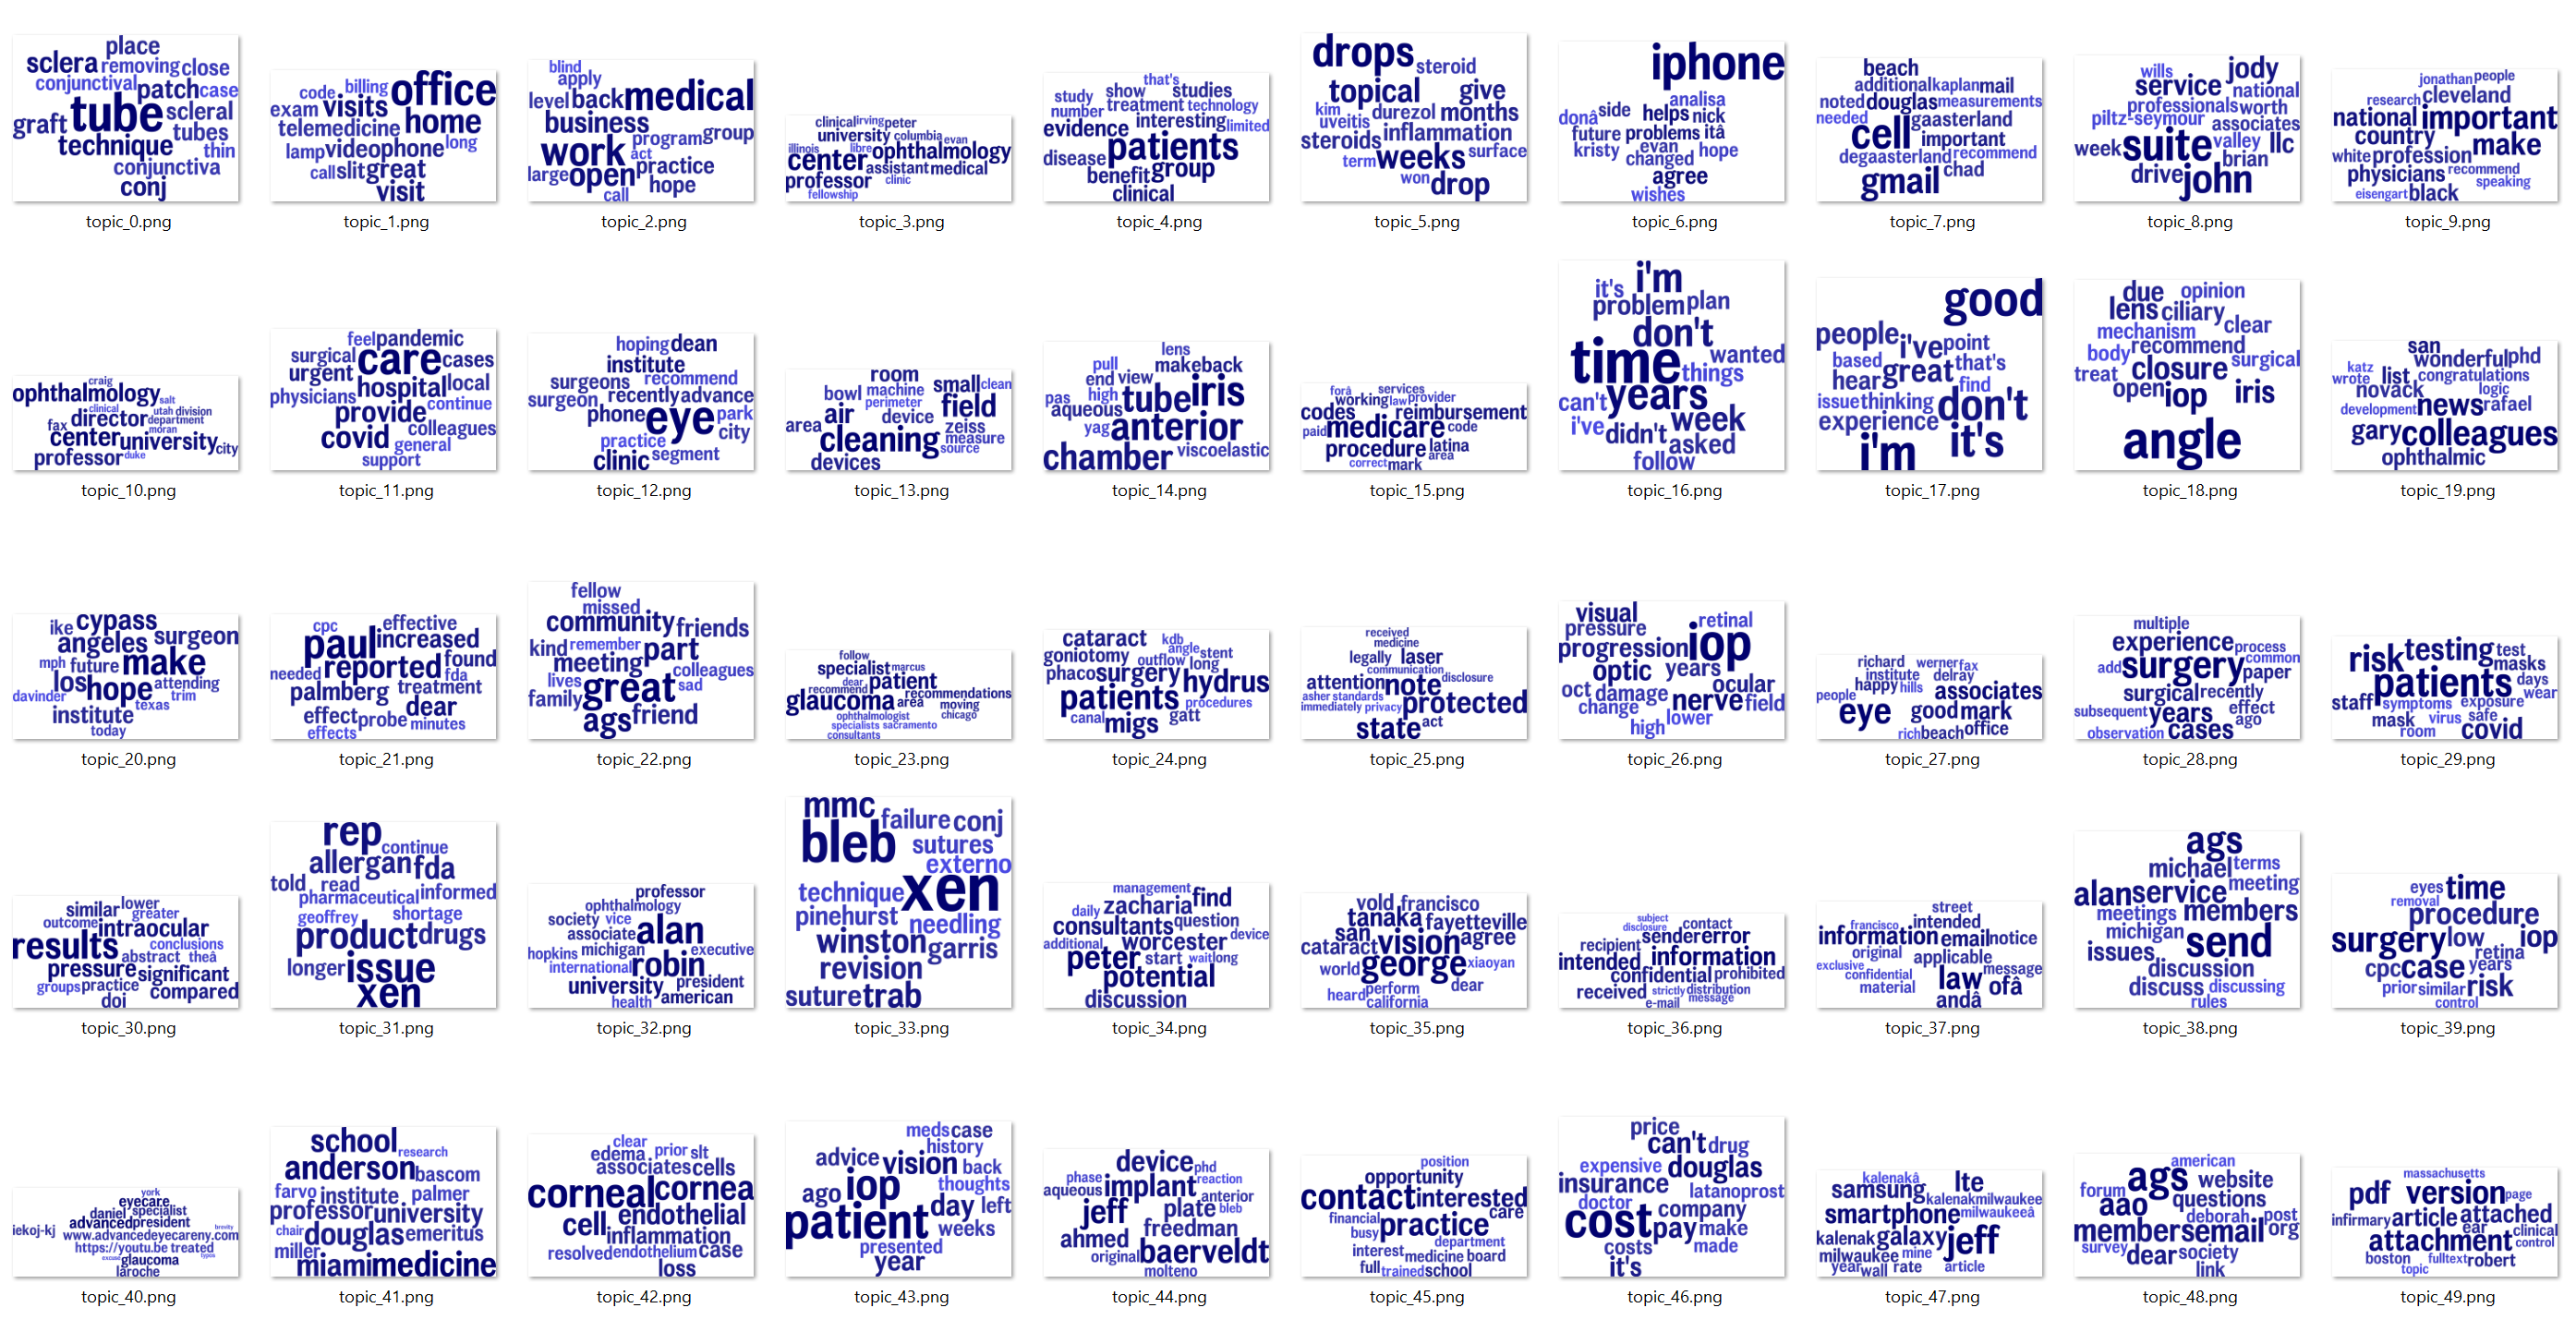

Tried 30, 40, and 50 topics. I think the cluster of 50 looks best actually, just based on face-validity and words seeming to make sense and hang together. 40 was not bad. 30 was getting a bit nonsensical. 

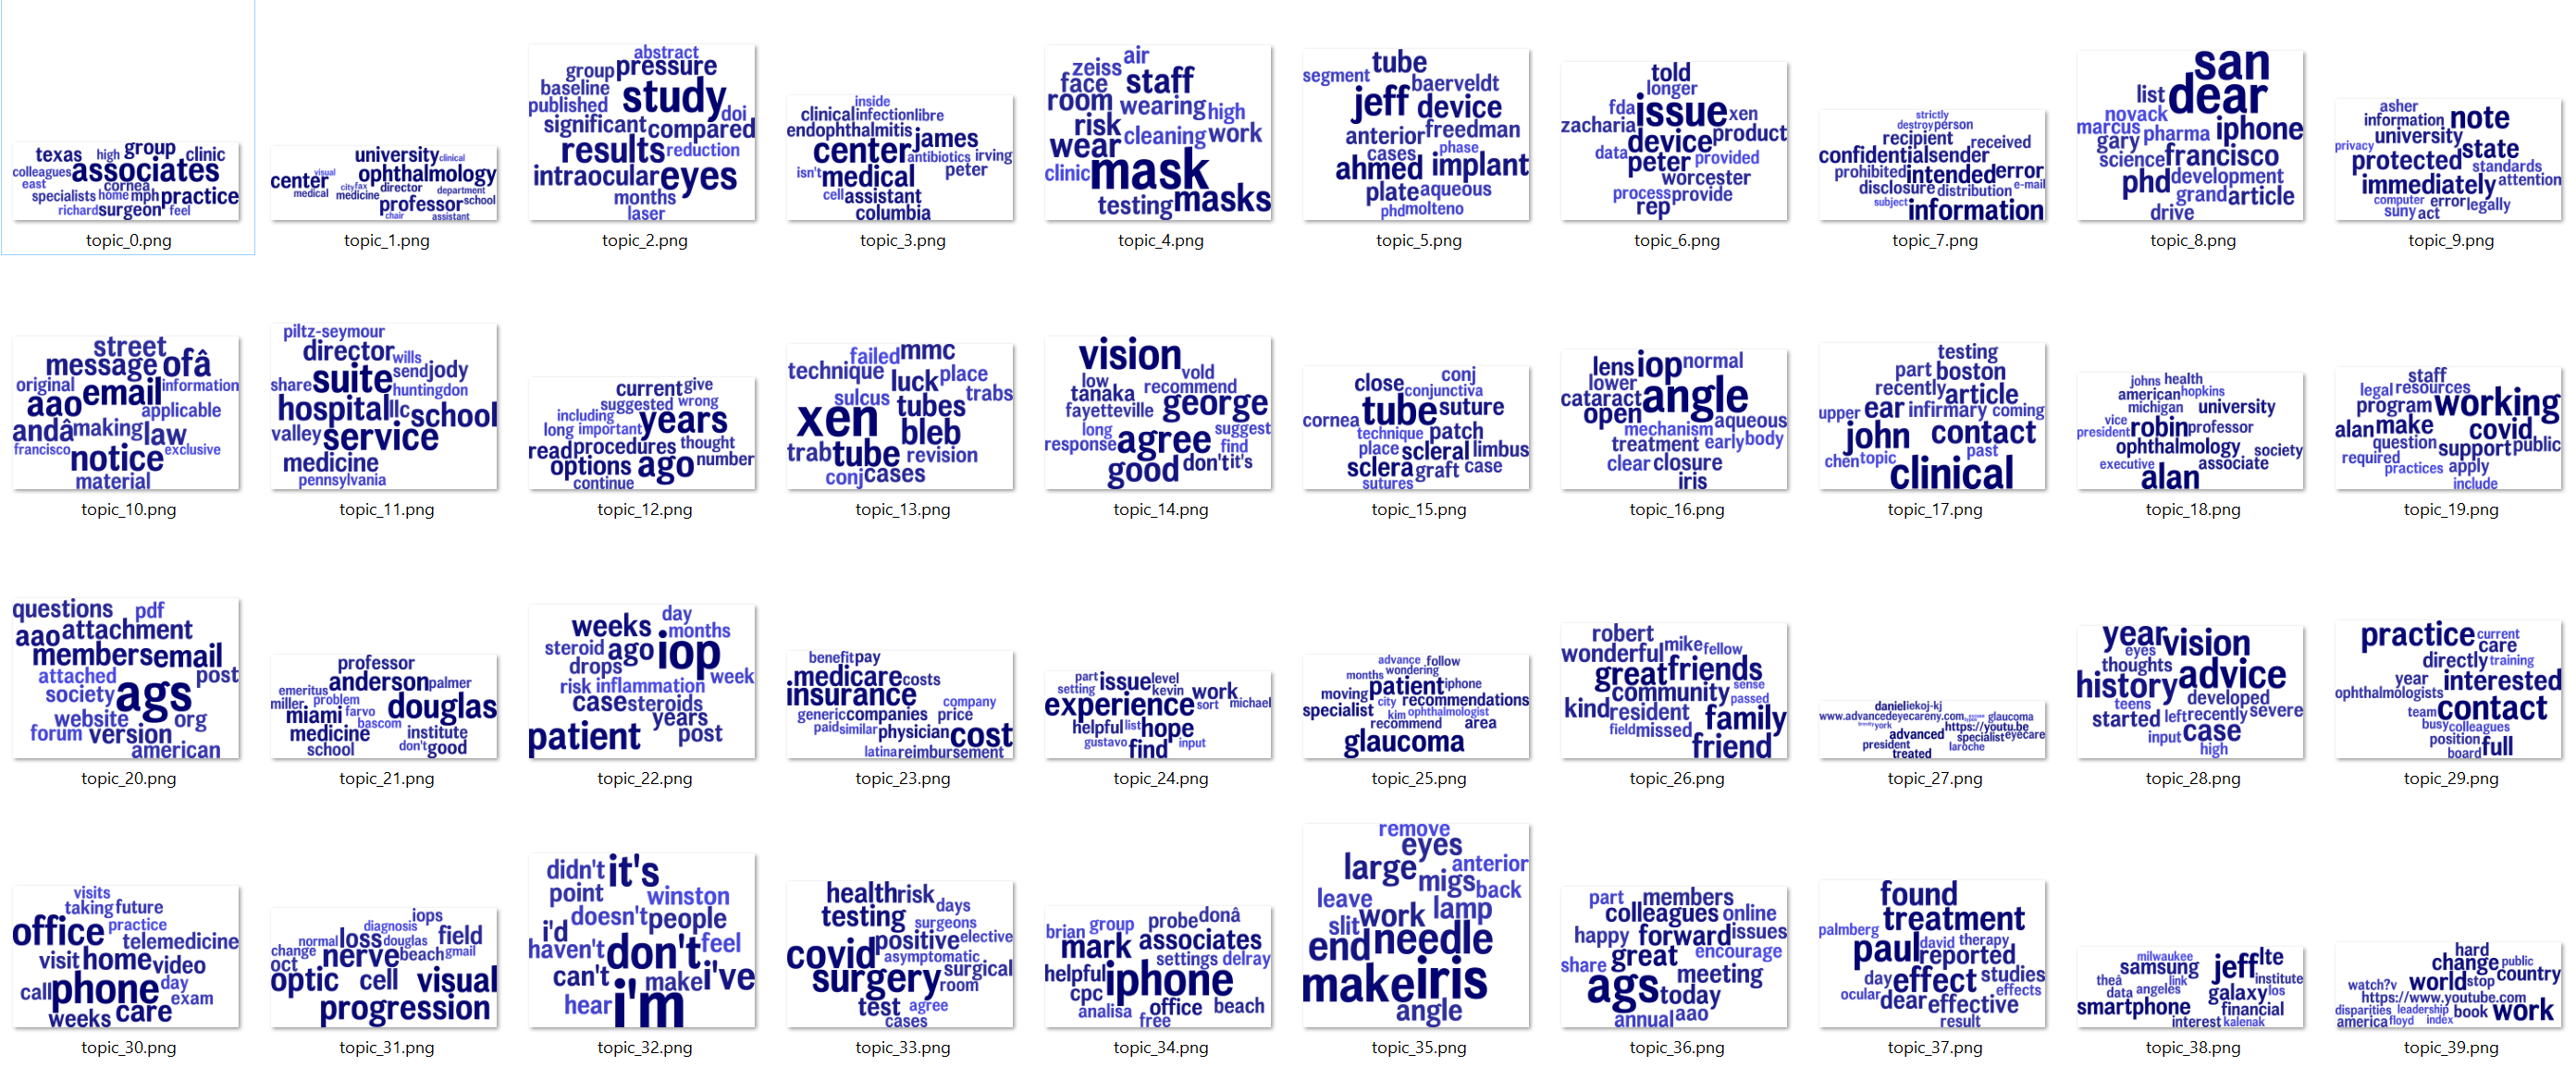